## Problem Statement

In this notebook, we will try to solve a deep learning related problem - "**Detecting digits from hand-drawn images"**.

This problem is hosted on Kaggle as - _Digit Recognizer Learn computer vision fundamentals with the famous MNIST data_ @ https://www.kaggle.com/c/digit-recognizer/overview

Our goal is to come up with a neural network model which is capable of predicting a digit from hand-written image.

### Importing the dataset

In [2]:
# Loading Dataset
#! pip3 install pandas
import pandas as pd
import numpy as np
np.random.seed(117)

from subprocess import check_output
print(check_output(["pwd", ""]).decode("utf8"))

df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')
print(df_train.head())

/kaggle/working

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0  

## Exploratory Data Analysis

From the sample, we may infer that label column will range from 0-9 and there are 784 pixel values provided (28x28 dimension).

In [3]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Since the pixel values range from 0-254, the images must be stored in grey-scale format.

### Class Imbalance

Since we are dealing with labels 0-9 or a 10 class problem, it is always advised to check for class imbalance.

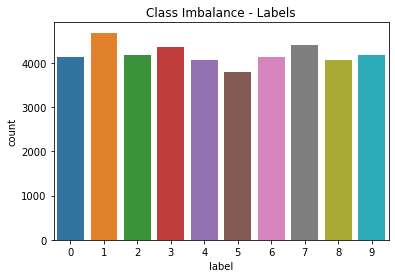

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="label", data=df_train).set_title("Class Imbalance - Labels")
plt.show()

The labels seem to be nearly balanced. So we can forget about class imbalance issue here.

### Dealing Missing Values.


In [5]:
# Columns with NAs
print(df_train.columns[df_train.isna().any()].tolist())
print(df_test.columns[df_test.isna().any()].tolist())

[]
[]


Since there are no missing values in the dataset we may proceed to data scaling.

### Scaling Numeric Variables

All pixel values range from 0 to 254 and we may just divide all by 254 to get corresponding mapping in [0,1].

In [6]:
# UDF for scaling
def scaler(pixel):
    return ((pixel)/254)

In [7]:
# Splitting variables
X_T = df_train.drop(['label'], axis=1)
Y_T = df_train.label
X_T.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Applying UDF
X_T = X_T.apply(scaler) 
X_Test = df_test.apply(scaler) 
X_T.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000863,0.000461,0.000232,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024854,0.018243,0.012892,0.006929,0.007459,0.001631,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,0.996063,0.996063,1.000000,0.244094,0.0,0.0,0.0,0.0


### Reshaping Pixels

In [9]:
X_T = X_T.values.reshape(-1,28,28,1)
X_Test = X_Test.values.reshape(-1,28,28,1)

### Encoding categorical response variable - One hot Encoding

In [10]:
from keras.utils.np_utils import to_categorical
Y_T= to_categorical(Y_T)

### Train/Validation Split
The available data is converted to train and validation sets on ratio 0.7.


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_T, Y_T, test_size = 0.3)

## Modelling - Convolutional Neural Network 

Reference - https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [12]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

model= Sequential()
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [14]:
batches = gen.flow(X_train, Y_train, batch_size=64)
val_batches=gen.flow(X_val, Y_val, batch_size=64)

In [15]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
  460/29400 [..............................] - 2s 5ms/step - loss: 0.6454 - accuracy: 0.8382 - val_loss: 0.3803 - val_accuracy: 0.8960


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Adding Batch Normalization in CNN 

In [17]:
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam


def get_bn_model():
    model = Sequential([
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

  460/29400 [..............................] - 57s 125ms/step - loss: 0.1901 - accuracy: 0.9469 - val_loss: 0.2013 - val_accuracy: 0.9453


## Model Storage

In [21]:
model.save("digit_mnist.h5")

## Kaggle Submission

In [23]:
predictions = model.predict_classes(X_Test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("digit_mnist.csv", index=False, header=True)